<a href="https://colab.research.google.com/github/rajeshdas16861/my-learning-at-YBI-foundation/blob/main/Avrage_milage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#information about the DataSet

**Source:**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.


**Data Set Information:**
***
This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


**Attribute Information**:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)



#Import Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Import DataSet

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


#Remove Missing Values

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

#Data Visualisation

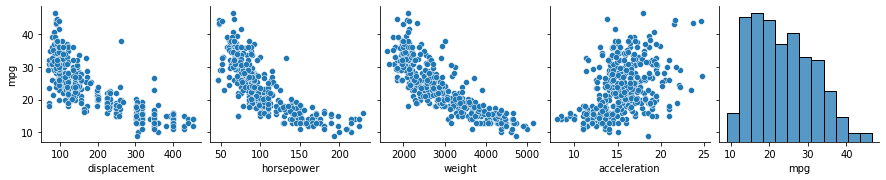

In [ ]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

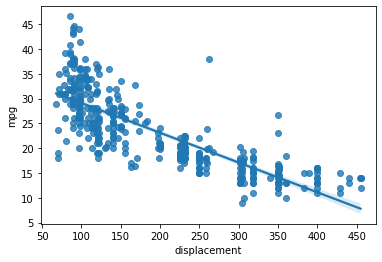

In [ ]:
sns.regplot( x = 'displacement', y = 'mpg', data = df)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

#Define target y and feature X

In [ ]:
y = df['mpg']

In [ ]:
x = df[['displacement','horsepower','weight','acceleration']]

In [ ]:
x.shape,y.shape

((392, 4), (392,))

# Scalling the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_sc = sc.fit_transform(x)

In [ ]:
x_sc

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(x_sc).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-2.537653e-16,-4.392745e-16,5.607759e-17,6.117555e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


#Import train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x_sc,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((274, 4), (274,), (118, 4), (118,))

#Import Regression Model

In [ ]:
#from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neighbors import KNeighborsRegressor

In [ ]:
lr = SVR()

#Train the Model

In [ ]:
lr.fit(x_train,y_train)

NameError: ignored

In [ ]:
#lr.coef_

In [ ]:
#lr.intercept_


**Milage = 23.48 -1.05 Displacement -1.68 HorsePower-4.1 Weigt - 0.115 Accleration**

#Predict Test Data

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([16.68781599, 14.99223445, 14.27267398, 23.8190515 , 30.62430143,
       21.56045137, 25.8253707 , 22.29209336, 14.72247454, 13.78354674,
       22.75336387, 26.31188993, 27.64923044, 31.15251201, 17.28532122,
       17.4386242 , 28.0782283 , 31.72764406, 29.65391959, 26.85368014,
       16.94090192, 19.76326033, 24.12415389, 29.17353375, 18.31245995,
       14.88309007, 20.39552965, 16.24265028, 24.58597367, 17.41633546,
       20.30725477, 15.84598862, 17.28929894, 29.3691756 , 18.43665551,
       29.20794928, 22.51831249, 19.63094488, 13.1528071 , 13.65526272,
       18.62046868, 17.41320411, 14.66503093, 16.38339907, 19.74807499,
       28.95663986, 13.95398773, 24.35847384, 28.95166461, 19.59646523,
       19.17666226, 16.51897163, 22.28308661, 30.3641607 , 13.05459043,
       15.19821081, 28.26327337, 19.88141919, 17.74681598, 31.16417407,
       18.56913824, 25.54781616, 20.0278026 , 14.29239999, 22.56469938,
       25.72207262, 14.76620856, 22.24382739, 30.61960572, 14.82

#Model Accuracy

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.12801603835176192

In [ ]:
mean_absolute_error(y_test,y_pred)

2.978809664619998

In [ ]:
r2_score(y_test,y_pred)

0.7068938973046404

mean_absolute_percentage_error for,


1.  LinearRegression=0.14
1.    KNeighborsRegressor = 0.126
2.   DecisionTreeRegressor = 0.155
4.  SVR = 0.128
5.Polynomial Function = 0.133


#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2,interaction_only=True, include_bias=False)

In [ ]:
x_train2 = poly.fit_transform(x_train)

In [ ]:
x_test2 = poly.fit_transform(x_test)

In [ ]:
lr.fit(x_train2,y_train)

SVR()

In [ ]:
#lr.intercept_

In [ ]:
#lr.coef_

In [ ]:
y_pred_poly = lr.predict(x_test2)

#Model accurecy

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

3.0909838708883743

In [ ]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.13320230212635525

In [ ]:
r2_score(y_test,y_pred_poly)

0.6847062300729769

**Conclusion**



By using all the regression model we found that KNeighbourregressor gives lower mean_absolute_percentage_error So we can say that for predicting average milage of the dataset we can use the **KneighbourRegressor** for higher accurate prediction.